<a href="https://colab.research.google.com/github/samarth2015/writing_assignment/blob/main/Road_safety.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Group members:**

- Praanshu Patel (23110249)
- Samarth Sonawane (23110317)
- Akshat Shah (23110293)

## Data Loading:

In [ ]:
# Loading the dataset (Making a pandas Dataframe with each row as a country)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Important data in each file:
# Type of data: (col 2)
# - Global loctation (eg-Africa, East Mediterranean, etc.) (col 4: code and col 5: name)
# - Country name (col 7: code and col 8: name)
# Data value (col 30)
# Extra data if present: (col 12: type of data, col 13: data)
# Year of data (col 10)

# Function to load and process the dataset
def load_dataset(file_path):
    # Read the dataset
    df = pd.read_csv(file_path, encoding='UTF-8')

    # Select relevant columns and rename them
    df = df.iloc[:, [1, 3, 4, 6, 7, 9, 11, 12, 29]]
    df.columns = ['Type', 'Global_Location_Code', 'Global_Location_Name',
                  'Country_Code', 'Country_Name', 'Year', 'Data_Type', 'Data_Description', 'Value']


    # Convert Data_Type and Data_Description to '-' if they are NaN
    df['Data_Type'] = df['Data_Type'].fillna('-')
    df['Data_Description'] = df['Data_Description'].fillna('-')

    return df


In [ ]:
# Folder containing the dataset files
folder_path = '/content/'

# Loading all the datasets in the folder
import os

files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
files.sort()
dataframes = []
for file in files:
    file_path = os.path.join(folder_path, file)
    df = load_dataset(file_path)
    dataframes.append(df)
    # display(df.head())  # Display the first few rows of each dataframe

## Get summary of any country using

### Here is the StreamLit app to view the data of the individual countries.
It includes the following stats
- Existence of a national road safety strategy
- Availability of funding for national road safety strategy
- Existence of a national seat-belt law
- Existence of a national child-restraint law
- Existence of a road safety lead agency
- Existence of national speed limits
- Existence of a national drink-driving law
- Seat-belt Wearing Rate (%)
- Helmet Law Applicability
- Speed & Alcohol Limits
- Estimated Road Traffic Deaths

It also includes distribution of Seat-belt Wearing Rate and Helmet Law.

In [ ]:
# merge all the dfs
df = pd.concat(dataframes, ignore_index=True)
# save the data in csv file
df.to_csv('merged_dataset.csv', index=False)

In [ ]:
from IPython.display import IFrame
import subprocess
import time

# Run the Streamlit app
subprocess.Popen(["streamlit", "run", "app.py"])

# Give Streamlit a few seconds to start
time.sleep(5)

# Display inside notebook (port must match the one Streamlit uses)
IFrame(src='http://localhost:8501', width=1200, height=720)


FileNotFoundError: [Errno 2] No such file or directory: 'streamlit'

## World Heat-Map of Death Rates

Lets start by taking a look at the Heat map of the Death rates around the world. Lets analyse the data of the road safety by considering various laws / facilities and their enforcement and its effect on the death rates across the world.

In [ ]:
import plotly.express as px

In [ ]:
df_death_rate = dataframes[8]
type(df_death_rate["Value"][0])

numpy.float64

In [ ]:
# Drop NaNs and reset index
df_death_rate.dropna(subset=['Value'], inplace=True)
df_death_rate.reset_index(drop=True, inplace=True)


In [ ]:
pivot_table = df_death_rate.pivot_table(
    index=['Country_Code', 'Country_Name'],
    values='Value',
    aggfunc='mean'
).reset_index()

fig = px.choropleth(
    pivot_table,
    locations='Country_Code',
    locationmode='ISO-3',
    color='Value',
    hover_name='Country_Name',
    title='Estimated Road Traffic Death Rate (per 100,000 population)',
    color_continuous_scale=px.colors.sequential.Plasma,
    labels={'Value': 'Death Rate'}
)

fig.update_geos(projection_type='natural earth')
fig.update_layout(title_x=0.5)
fig.show()

## Helmet laws (and their enforcement) with motorcycle-related road traffic deaths.

### Are Road Safety Laws strictly implemented?

Every year, over a million lives are lost due to road crashes. But behind these numbers lies a critical question:

**Do laws actually save lives, or are they just ink on paper?**

In this notebook, we explore two key questions:
1. How strict are helmet and seatbelt laws across countries?
2. Are stronger laws associated with fewer deaths among motorcyclists?

Let's find out.


In [ ]:

helmet_laws = dataframes[0]
helmet_fastened = dataframes[-4]
seatbelt_laws = dataframes[1]
national_seatbelt_law = dataframes[-6]
death_distribution = dataframes[6]


To begin, we explore the legal landscape:

- Which countries require helmets for all motorcycle users?
- Are helmets legally required to be fastened?
- What about rear seatbelt laws?

In [ ]:
# Filter for adult passengers and drivers
helmet_all = helmet_laws[helmet_laws['Data_Description'].isin(['Drivers', 'Adult passengers'])]

# Count countries that have helmet laws for both
helmet_status = helmet_all.groupby('Country_Code')['Value'].apply(lambda x: all(val == 'Yes' for val in x)).reset_index()
helmet_status.columns = ['Country_Code', 'Helmet_Law_All_Occupants']
helmet_status['Helmet_Law_All_Occupants'] = helmet_status['Helmet_Law_All_Occupants'].astype(int)  # 1 = Yes, 0 = No

helmet_status.head()


,Country_Code,Helmet_Law_All_Occupants
0,AFG,0
1,AGO,1
2,ALB,1
3,ARE,1
4,ARG,1


In [ ]:
helmet_fastened['Helmet_Fastened'] = helmet_fastened['Value'].apply(lambda x: 1 if x.strip().lower() == 'yes' else 0)
helmet_fastened = helmet_fastened[['Country_Code', 'Helmet_Fastened']]
helmet_fastened.head()


,Country_Code,Helmet_Fastened
0,AFG,0
1,ATG,0
2,COM,0
3,DMA,0
4,GUY,0


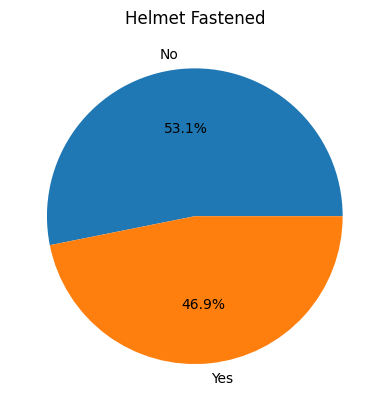

In [ ]:
plt.pie(helmet_fastened['Helmet_Fastened'].value_counts(), labels=['No', 'Yes'], autopct='%1.1f%%')
plt.title('Helmet Fastened')
plt.show()

**Above Graph**

It is clearly seen that approximately 50% of the countries need helmets to be fastened which is really concerning. We know that only fastened helmets can save the life of a person.

In [ ]:
helmet_data = pd.merge(helmet_status, helmet_fastened, on='Country_Code', how='inner')
helmet_data.head()


,Country_Code,Helmet_Law_All_Occupants,Helmet_Fastened
0,AFG,0,0
1,AGO,1,1
2,ALB,1,0
3,ARE,1,0
4,ARG,1,1


#### Insight: Strictness of Helmet Laws

We define a country as having a **strict helmet law** if it:
- Applies to both drivers and adult passengers, AND
- Requires helmets to be fastened.


In [ ]:
helmet_data["Strict_Helmet_Law"] = helmet_data.apply(
    lambda row: 1 if row["Helmet_Law_All_Occupants"] == 1 and row["Helmet_Fastened"] == 1 else 0, axis=1
)
helmet_data.head()

,Country_Code,Helmet_Law_All_Occupants,Helmet_Fastened,Strict_Helmet_Law
0,AFG,0,0,0
1,AGO,1,1,1
2,ALB,1,0,0
3,ARE,1,0,0
4,ARG,1,1,1


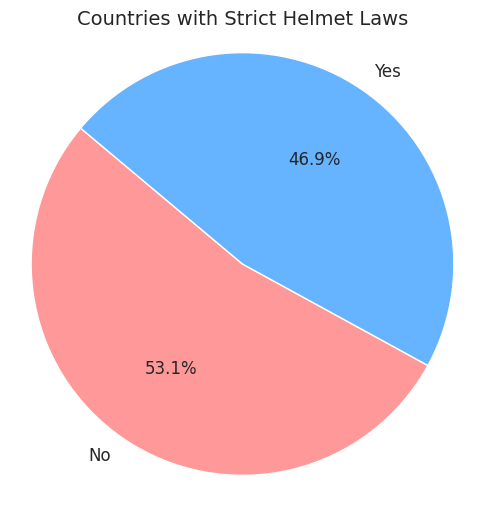

In [ ]:
# Optional: apply seaborn style
sns.set_theme(style="whitegrid")

# Count values
helmet_counts = helmet_data['Strict_Helmet_Law'].value_counts().sort_index()

# Labels and colors
labels = ['No', 'Yes']
colors = ['#ff9999', '#66b3ff']

# Plot
plt.figure(figsize=(6, 6))
plt.pie(
    helmet_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12}
)

plt.title("Countries with Strict Helmet Laws", fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures pie is circular
plt.show()


### Do Laws Work?

**Let’s now explore the link between the laws and actual motorcycle-related fatalities.**

We'll use the % of road traffic deaths that are motorcyclists as a proxy for vulnerability.


In [ ]:
moto_deaths = death_distribution[death_distribution['Data_Description'] == 'Drivers/passengers of motorized 2- or 3-wheelers']
moto_deaths = moto_deaths[['Country_Code', 'Value']]
moto_deaths.columns = ['Country_Code', 'Motorcyclist_Death_Percentage']
moto_deaths['Motorcyclist_Death_Percentage'] = pd.to_numeric(moto_deaths['Motorcyclist_Death_Percentage'], errors='coerce')


In [ ]:
moto_deaths

,Country_Code,Motorcyclist_Death_Percentage
1,ATG,0.0
4,BWA,0.0
11,DMA,0.0
16,JOR,0.0
30,FSM,0.0
...,...,...
633,SWZ,2.0
637,NIC,26.0
648,AND,50.0
653,MHL,66.7


In [ ]:
law_vs_deaths = pd.merge(helmet_data, moto_deaths, on='Country_Code', how='inner')
law_vs_deaths.dropna(inplace=True)

law_vs_deaths.head()


,Country_Code,Helmet_Law_All_Occupants,Helmet_Fastened,Strict_Helmet_Law,Motorcyclist_Death_Percentage
0,ALB,1,0,0,11.9
1,ARE,1,0,0,5.5
2,ARG,1,1,1,22.2
3,ARM,1,1,1,1.5
4,ATG,0,0,0,0.0


In [ ]:
law_vs_deaths['Strict_Helmet_Law_Label'] = law_vs_deaths['Strict_Helmet_Law'].map({0: 'No Strict Law', 1: 'Strict Law'})

fig = px.box(
    law_vs_deaths,
    x='Strict_Helmet_Law_Label',
    y='Motorcyclist_Death_Percentage',
    color='Strict_Helmet_Law_Label',
    color_discrete_map={'No Strict Law': '#ff9999', 'Strict Law': '#66b3ff'},
    points="all",
    hover_data=['Country_Code']
)

fig.update_layout(
    title="Motorcyclist Deaths vs. Strict Helmet Laws",
    xaxis_title="Strict Helmet Law",
    yaxis_title="Motorcyclist Deaths (% of total)",
    showlegend=False,
    template="plotly_white"
)

fig.show()


The above box plot shows that countries having strict helmets laws means where it is necessary to have helmets for both the passengers and it need to be fastened have relatively lower death rate than the countries having the no strict law.

In [ ]:
# Prepare data
sunburst_df = helmet_data.copy()
sunburst_df['Strict_Helmet_Law_Label'] = sunburst_df['Strict_Helmet_Law'].map({1: 'Strict Law', 0: 'No Strict Law'})

# Fill missing region if needed
sunburst_df = sunburst_df.dropna(subset=['Country_Code'])

# Plot sunburst
fig = px.sunburst(
    sunburst_df,
    path=['Strict_Helmet_Law_Label', 'Helmet_Fastened', 'Country_Code'],
    values=None,
    color='Strict_Helmet_Law_Label',
    color_discrete_map={'Strict Law': '#66b3ff', 'No Strict Law': '#ff9999'},
    title="Layers of Helmet Safety Laws Across Regions",
    width=700,
    height=600
)

fig.update_traces(textinfo='label+percent entry')
fig.show()


In [ ]:
fig = px.scatter(
    law_vs_deaths,
    x='Strict_Helmet_Law',
    y='Motorcyclist_Death_Percentage',
    color='Strict_Helmet_Law',
    text='Country_Code',
    color_discrete_map={1: '#66b3ff', 0: '#ff9999'},
    title='Motorcyclist Death % vs Helmet Law Strictness'
)

fig.update_traces(textposition='top center')
fig.update_layout(
    xaxis=dict(tickvals=[0, 1], ticktext=["No Strict Law", "Strict Law"]),
    yaxis_title="Motorcyclist Death Percentage"
)
fig.show()


#### Poor enforcement of laws

Not all the countries having the strict helmet laws perform better than the countries having the no strict helmet laws. Some countries having no strict laws actually perform better than the countries having the strict laws. It can be easily infered that these countries have poor enforcement laws and citizens are not taking their safety seriously. It should be the matter of concern for the all the people travelling by road.

**Countries below have the more than 40% of motorcyclist deaths despite of having strict laws**
- THA - Thailand
- MMR - Myanmar
- BEN - Benin
- PRY - Paraguay
- SUR - Suriname
- SGP - Singapore
- MLI - Mali
- IND - India

It really sad that India is in the list, here we have all the laws but still having this kind of performance in the road safety.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## Death Rate and Drunk Driving:


### Introduction: A World on Wheels and Wine?
Every year, road traffic claims over a million lives — a silent epidemic rushing past us on highways, city roads, and rural dirt tracks. Among the major culprits: alcohol. Drunk driving is a leading cause of road traffic deaths, and its impact varies significantly across countries.

Let’s dive into the data and take a ride across the globe — powered not by fuel, but by data.

In [ ]:
# World map using chloropleth for % deaths due to alcohol in each country/region

import plotly.express as px
import pandas as pd

# Load the dataset
df = pd.read_csv('merged_dataset.csv')

# Relevant values in 'Type' column:
# Attribution of deaths to alcohol
# Estimated number of road traffic deaths
# We will use only the rows with both and calculate the percentage of deaths due to alcohol for each country/region

# Filter the dataset for relevant types
dfe = df[df['Type'].isin(['Estimated number of road traffic deaths'])]
dfe.reset_index(drop=True, inplace=True)

# The data in 'Value' for Estimated number of road traffic deaths is in the form 10 [8-12] i.e. average [low-high]
# We need to convert this to a numeric value for calculations
def extract_value(value):
    if '[' in value:
        # Extract the average value from the range
        if "[" in value:
            avg_value = value.split('[')[0].strip()
            # Remove any spaces or commas
            avg_value = avg_value.replace(' ', '').replace(',', '')
            # Convert to float
            avg_value = float(avg_value)
        else:
            avg_value = float(value)
        return avg_value
    else:
        return float(value)

# Apply the function to the 'Estimated number of road traffic deaths' values
dfe['Value'] = dfe['Value'].apply(extract_value)
#display(dfe.head())

# Create a pivot table to get the values for each country/region
pivot_table_e = dfe.pivot_table(index=['Country_Code', 'Country_Name'], columns='Type', values='Value', aggfunc='mean').reset_index()

display(pivot_table_e.head())  # Display the first few rows of the pivot table

Type,Country_Code,Country_Name,Estimated number of road traffic deaths
0,AFG,Afghanistan,9684.0
1,AGO,Angola,5188.0
2,ALB,Albania,309.0
3,AND,Andorra,2.0
4,ARE,United Arab Emirates,557.0


### Mapping the Tragedy

We begin with a world map of alcohol-related road deaths — the lighter the colour, the greater the percentage of deaths due to drinking and driving (The gradient is also shown on the plot itself).

In [ ]:
# The percentage of deaths due to alcohol is given in the 'Attribution of deaths to alcohol' column
# We will use this to calculate the percentage of deaths due to alcohol for each country/region
import numpy as np

# Filter the dataset for relevant types
dfap = df[df['Type'].isin(['Attribution of road traffic deaths to alcohol (%)'])]

# Convert the 'Value' column to numeric values and handling exceptions that contain some letters
# The rest of the data is a float value in a string format (there is no range like previously)

def extract_value(value):
    if value=='–':
        value = np.nan
    else:
        value = float(value.split(' ')[0])
    return value

dfap['Value'] = dfap['Value'].apply(extract_value)
# Drop nan
dfap.dropna(subset=['Value'], inplace=True)
# reset index
dfap.reset_index(drop=True, inplace=True)
#display(dfap.head())

# Create a pivot table to get the values for each country/region
pivot_table_ap = dfap.pivot_table(index=['Country_Code', 'Country_Name'], columns='Type', values='Value', aggfunc='mean').reset_index()
#display(pivot_table_ap.head())  # Display the first few rows of the pivot table

# Make the world map using plotly express
fig = px.choropleth(pivot_table_ap,
                    locations='Country_Code',
                    locationmode='ISO-3',
                    color='Attribution of road traffic deaths to alcohol (%)',
                    hover_name='Country_Name',
                    title='Percentage of Road Traffic Deaths Attributed to Alcohol by Country/Region',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    labels={'Attribution of road traffic deaths to alcohol (%)': 'Percentage of Deaths Due to Alcohol'}
                   )
fig.update_geos(projection_type='natural earth')
fig.update_layout(title_x=0.5)  # Center the title

fig.show()

Some countries show staggering numbers (like South Africa, Lesotho, Papua New Guinea). Most Countries in Africa and South Asia do not have a large chunk attributed to alcohol. Other regions like the American Subcontinent, Northen Europe and Asia have a decent amount of deaths attributed to alcohol.

But what is the cause of this variation? Is this due to strong laws (Like BAC limit)? More funding for road safety strategies?

Let’s dig deeper.

### BAC vs Deaths

We now turn our attention to the **Blood Alcohol Concentration (BAC)** legal limit in each country. This is a key factor in drunk driving laws and can significantly impact road safety. The BAC legal limit is the maximum amount of alcohol a driver can have in their bloodstream while operating a vehicle. The lower the limit, the stricter the law.

One would expect that countries with lower BAC limits would have fewer deaths due to alcohol-related accidents. But is this the case?

We thus plotted each country as a bubble:
- X-axis: BAC legal limit in g/dl (lower = stricter?)
- Y-axis: % of deaths due to alcohol
- Bubble size: Same for one plot and Total traffic deaths for the other plot
- Bubble colour: Country name

In [ ]:
# Bubble chart:
#X-axis: BAC limit (lower = stricter)
#Y-axis: % of deaths due to alcohol
#Size: total traffic deaths
#Color: Country

import plotly.express as px
import pandas as pd
import numpy as np

# Using % deaths due to alcohol from the previous dfap dataframe
# Using size of total traffic deaths from the dfe dataframe

# Using BAC limit from the df dataframe
# Filter the dataset for relevant types
dfbac = df[df['Type'].isin(['Blood Alcohol Concentration (BAC) limit for drivers'])]
# The data is in the form: - if there is no limit
# Of the form <0.05 g/dl if there is a limit (< can also be <=)
# There is no < or <= if limit is 0 g/dl
# Some are of the form: 0.00 - 0.08 g/dl

# We will use the upper limit for the BAC limit

def extract_value(value):
    if value == '-':
        value = np.nan
    elif '=' in value:
        value = value.split('=')[1].strip()
        value = value.replace('g/dl', '').replace(' ', '').replace(',', '')
    elif '<' in value:
        value = value.split('<')[1].strip()
        value = value.replace('g/dl', '').replace(' ', '').replace(',', '')
    elif '-' in value:
        value = value.split('-')[1].strip()
        value = value.replace('g/dl', '').replace(' ', '').replace(',', '')
    else:
        value = value.split(' ')[0].strip()
        value = value.replace('g/dl', '').replace(' ', '').replace(',', '')

    return float(value)

# Apply the function to the 'Blood Alcohol Concentration (BAC) limit for drivers' values
dfbac['Value'] = dfbac['Value'].apply(extract_value)
# Drop nan
dfbac.dropna(subset=['Value'], inplace=True)
# reset index
dfbac.reset_index(drop=True, inplace=True)
#display(dfbac.head())

# Create a pivot table to get the values for each country/region
pivot_table_bac = dfbac.pivot_table(index=['Country_Code', 'Country_Name'], columns='Type', values='Value', aggfunc='mean').reset_index()
#display(pivot_table_bac.head())  # Display the first few rows of the pivot table

# Merge the dataframes to get the BAC limit, % deaths due to alcohol and total traffic deaths in one dataframe
# Merge the dataframes on Country_Code and Country_Name

merged_df = pd.merge(pivot_table_ap, pivot_table_bac, on=['Country_Code', 'Country_Name'], how='inner')
merged_df = pd.merge(merged_df, pivot_table_e, on=['Country_Code', 'Country_Name'], how='inner')
display(merged_df.head())  # Display the first few rows of the merged dataframe

# Make the bubble chart using plotly express

# scale the size of the bubbles to be more manageable
merged_df['Scaled Deaths'] = merged_df['Estimated number of road traffic deaths'] / 1000

# Sort so that large bubbles go behind
merged_df = merged_df.sort_values('Scaled Deaths', ascending=False)
fig1 = px.scatter(
    merged_df,
    x='Blood Alcohol Concentration (BAC) limit for drivers',
    y='Attribution of road traffic deaths to alcohol (%)',
    #size='Scaled Deaths',  # scaled size
    color='Country_Name',  # each country gets a unique color
    hover_name='Country_Name',
    title='Bubble Chart: BAC Limit vs % Deaths Due to Alcohol',
    labels={
        'Blood Alcohol Concentration (BAC) limit for drivers': 'BAC Limit (g/dl)',
        'Attribution of road traffic deaths to alcohol (%)': 'Percentage of Deaths Due to Alcohol'
    },
    size_max=30,  # reduce max size
    height=600,
)

fig1.update_traces(marker=dict(sizemode='diameter', opacity=0.7, line_width=1))
fig1.update_layout(
    title_x=0.5,
    legend_title_text='Country',
    showlegend=True  # set True if you want a clickable color legend
)

fig1.show()

fig = px.scatter(
    merged_df,
    x='Blood Alcohol Concentration (BAC) limit for drivers',
    y='Attribution of road traffic deaths to alcohol (%)',
    size='Scaled Deaths',  # scaled size
    color='Country_Name',  # each country gets a unique color
    hover_name='Country_Name',
    title='Bubble Chart: BAC Limit vs % Deaths Due to Alcohol (with size of bubble as Total Deaths)',
    labels={
        'Blood Alcohol Concentration (BAC) limit for drivers': 'BAC Limit (g/dl)',
        'Attribution of road traffic deaths to alcohol (%)': 'Percentage of Deaths Due to Alcohol'
    },
    size_max=30,  # reduce max size
    height=600,
)

fig.update_traces(marker=dict(sizemode='diameter', opacity=0.7, line_width=1))
fig.update_layout(
    title_x=0.5,
    legend_title_text='Country',
    showlegend=True  # set True if you want a clickable color legend
)

fig.show()

Type,Country_Code,Country_Name,Attribution of road traffic deaths to alcohol (%),Blood Alcohol Concentration (BAC) limit for drivers,Estimated number of road traffic deaths
0,ALB,Albania,5.2,0.050,309.0
1,ARE,United Arab Emirates,1.8,0.010,557.0
2,ARG,Argentina,17.0,0.050,3983.0
3,ARM,Armenia,1.9,0.040,379.0
4,AUS,Australia,17.0,0.025,1163.0


Our eyes search for a pattern. Is stricter better? Are countries with tighter BAC limits safer?

Surprisingly… no clear trend. Big or small, strict or lenient — countries seem scattered. Some with high BAC limits have low alcohol-related deaths, while others with low limits have high deaths. Even the countries with the highest death rate due to alcohol (like South Africa, Lesotho, and Papua New Guinea) have a wide range of BAC limits. This suggests that the relationship between BAC limits and alcohol-related deaths is not straightforward.

In order to test this hypothesis, we can use a linear regression model to see if there is any correlation between the two variables.

### The Linear Lie
To test our intuition, we tried to fit a regression line between BAC limit and alcohol-related deaths.

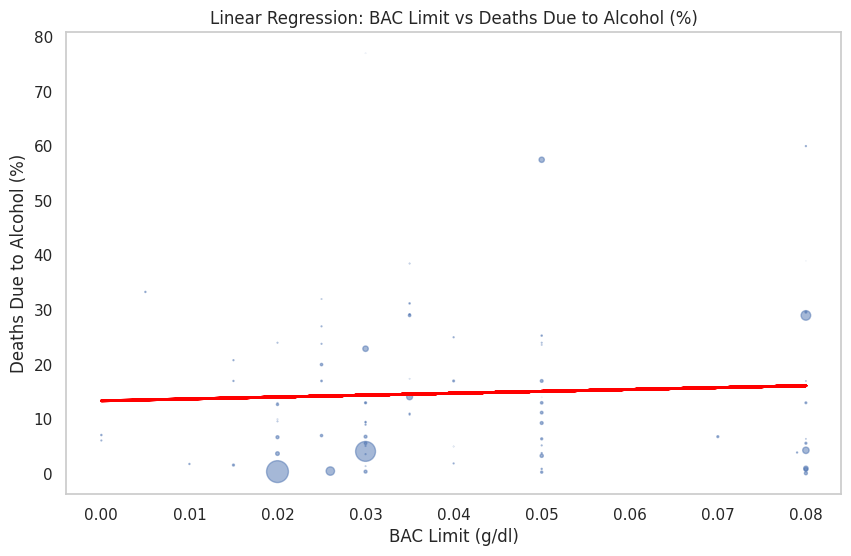

In [ ]:
# regression line for the bubble chart
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Data for regression: merged_df dataframe
# X: BAC limit (g/dl)
# Y: % deaths due to alcohol
# Size: total traffic deaths (scaled)
# Color: Country
# We will use the scaled size for the regression line

# Create a new dataframe with the relevant columns
regression_df = merged_df[['Blood Alcohol Concentration (BAC) limit for drivers',
                             'Attribution of road traffic deaths to alcohol (%)',
                             'Scaled Deaths']].copy()
regression_df.rename(columns={'Blood Alcohol Concentration (BAC) limit for drivers': 'BAC Limit',
                               'Attribution of road traffic deaths to alcohol (%)': 'Deaths Due to Alcohol (%)',
                               'Scaled Deaths': 'Total Deaths'}, inplace=True)
# Drop rows with NaN values
regression_df.dropna(inplace=True)
# Reset index
regression_df.reset_index(drop=True, inplace=True)
#display(regression_df.head())

# Create a linear regression model
X = regression_df['BAC Limit']
Y = regression_df['Deaths Due to Alcohol (%)']
X = sm.add_constant(X)  # Add a constant term to the predictor

model = sm.OLS(Y, X).fit()  # Fit the model
predictions = model.predict(X)  # Make predictions

# Print the summary of the model
#print(model.summary())

# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X['BAC Limit'], Y, s=regression_df['Total Deaths'], alpha=0.5)
plt.plot(X['BAC Limit'], predictions, color='red', linewidth=2)
plt.xlabel('BAC Limit (g/dl)')
plt.ylabel('Deaths Due to Alcohol (%)')
plt.title('Linear Regression: BAC Limit vs Deaths Due to Alcohol (%)')
plt.grid()
plt.show()

But the line is nearly flat — like a car that just won’t start.

This suggests that BAC limit alone isn’t a silver bullet. There might be other factors at play.

Maybe it’s not just about the laws, but how they’re enforced. Or perhaps it’s about the funding for road safety strategies. Maybe the countries with the most deaths have the least funding for road safety and the countries with the least deaths have the most funding.

### Money Matters?

Maybe it’s money that matters.

We first find the percentage of countries that have recieve fundings for road safety strategies.
- 18% of countries have full funding for road safety strategies.
- 74% of countries have partial funding for road safety strategies.
- 8% of countries have no funding for road safety strategies.

Then, we make a similar bubble plot with the funding for road safety strategies as the colour of the bubble.

In [ ]:
# Bar plot for Number of countries vs Availability of funding for national road safety strategy
import plotly.express as px
import pandas as pd
import numpy as np

# The data is the rows with Type: Availability of funding for national road safety strategy
# The data is in the form: - if there is no data
# the rest are in the 3 class: - Not funded, - Partially funded, - Fully funded

# We will use the number of countries in each class to make the bar plot
# Filter the dataset for relevant types
df_funding = df[df['Type'].isin(['Availability of funding for national road safety strategy'])]

def extract_value(value):
    if value == '−':
        value = np.nan
    else:
        value = value

    return value

# Apply the function to the 'Availability of funding for national road safety strategy' values
df_funding['Value'] = df_funding['Value'].apply(extract_value)
# Drop nan
df_funding.dropna(subset=['Value'], inplace=True)
# reset index
df_funding.reset_index(drop=True, inplace=True)
#display(df_funding.head())

# Bar plot for Number of countries vs Availability of funding for national road safety strategy
# Create a new dataframe with the relevant columns
funding_df = df_funding[['Country_Code', 'Country_Name', 'Value']].copy()
funding_df.rename(columns={'Value': 'Funding'}, inplace=True)

# Count the number of countries in each class
funding_count = funding_df['Funding'].value_counts().reset_index()
funding_count.columns = ['Funding', 'Count']

# Make the bar plot using plotly express
fig = px.bar(funding_count,
             x='Funding',
             y='Count',
             title='Number of Countries vs Availability of Funding for National Road Safety Strategy',
             labels={'Funding': 'Availability of Funding', 'Count': 'Number of Countries'},
             color='Funding',
             color_discrete_sequence=px.colors.qualitative.Plotly)
fig.update_layout(title_x=0.5)  # Center the title
fig.show()

# Calculate the percentage of countries in each class
funding_count['Percentage'] = (funding_count['Count'] / funding_count['Count'].sum()) * 100
print(funding_count)

# Using fig 1 but with color as funding

# Modify the dataframe to include the funding information
merged_df2 = merged_df.copy()
merged_df2 = pd.merge(merged_df2, funding_df, on=['Country_Code', 'Country_Name'], how='inner')
#display(merged_df2.head())  # Display the first few rows of the merged dataframe

fig1 = px.scatter(
    merged_df2,
    x='Blood Alcohol Concentration (BAC) limit for drivers',
    y='Attribution of road traffic deaths to alcohol (%)',
    #size='Scaled Deaths',  # scaled size
    color='Funding',  # each country gets a unique color
    hover_name='Country_Name',
    title='Bubble Chart: BAC Limit vs % Deaths Due to Alcohol (with size of bubble as Total Deaths)',
    labels={
        'Blood Alcohol Concentration (BAC) limit for drivers': 'BAC Limit (g/dl)',
        'Attribution of road traffic deaths to alcohol (%)': 'Percentage of Deaths Due to Alcohol'
    },
    size_max=30,  # reduce max size
    height=600,
)
fig1.update_traces(marker=dict(sizemode='diameter', opacity=0.7, line_width=1))
fig1.update_layout(
    title_x=0.5,
    legend_title_text='Country',
    showlegend=True  # set True if you want a clickable color legend
)
fig1.show()

            Funding  Count  Percentage
0  Partially funded    110   73.825503
1      Fully funded     27   18.120805
2        Not funded     12    8.053691


Again, we find no strong correlation between funding and alcohol-death percentage. Some funded countries do well, some don’t.

This suggests that funding alone may not be the answer. Or maybe the funding is not being used effectively.

### Conclusion: Complexity on the Road

Our journey reveals one thing clearly: there’s no one-size-fits-all answer.

Laws, funding, and limits matter — but only as part of a broader, enforced, and culturally sensitive system.

The road to safety is winding. But with data as our map, we’re one step closer to getting there.

# Relationship Between Maximum Speed Limits and Road Traffic Death Rates


The open road promises freedom, speed, and adventure — but it can also be deadly. Each year, countless lives are lost in traffic accidents, with some countries experiencing far higher death rates than others.

### **Do higher maximum speed limits correlate with more road deaths?**
Let's explore the numbers and uncover what the data has to say.

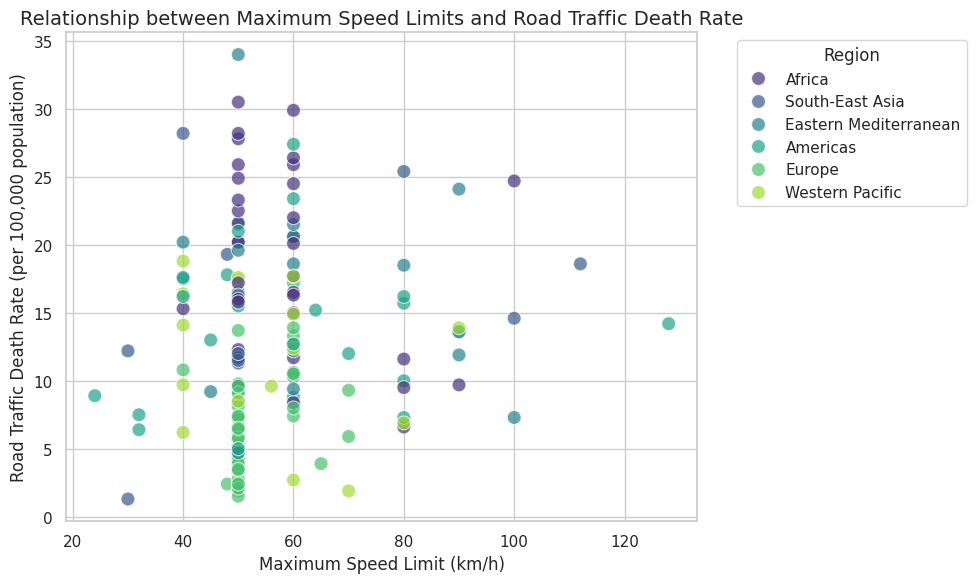

In [42]:
df = pd.read_csv('merged_dataset.csv')
maximum_speed_limits = df[df['Type'].isin(['Maximum speed limits'])]
estimated_road_traffic_death_rate = df[df['Type'].isin(['Estimated road traffic death rate (per 100 000 population)'])]
# Define a function to clean and extract numeric values from the 'Value' column
def clean_speed_limit(value):
    if isinstance(value, str):
        if '-' in value:  # Handle ranges like "20 - 70"
            return float(value.split('-')[-1].strip())
        elif value.strip() in ['?', '_']:  # Handle invalid entries
            return np.nan
    try:
        return float(value)
    except ValueError:
        return np.nan

# Apply the cleaning function to both datasets
maximum_speed_limits['Value'] = maximum_speed_limits['Value'].apply(clean_speed_limit)
estimated_road_traffic_death_rate['Value'] = estimated_road_traffic_death_rate['Value'].apply(clean_speed_limit)

# Convert to numeric explicitly (in case cleaning left some strings)
maximum_speed_limits['Value'] = pd.to_numeric(maximum_speed_limits['Value'], errors='coerce')
estimated_road_traffic_death_rate['Value'] = pd.to_numeric(estimated_road_traffic_death_rate['Value'], errors='coerce')

# Merge the two datasets on 'Country_Code'
merged_data = pd.merge(
    maximum_speed_limits[['Country_Code', 'Value', 'Global_Location_Name']],
    estimated_road_traffic_death_rate[['Country_Code', 'Value']],
    on='Country_Code',
    suffixes=('_Max_Speed_Limit', '_Death_Rate')
)

# Rename columns for clarity
merged_data.rename(columns={
    'Value_Max_Speed_Limit': 'Max_Speed_Limit',
    'Value_Death_Rate': 'Death_Rate'
}, inplace=True)

# Drop rows with missing or invalid data
merged_data.dropna(subset=['Max_Speed_Limit', 'Death_Rate'], inplace=True)

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=merged_data,
    x='Max_Speed_Limit',
    y='Death_Rate',
    hue='Global_Location_Name',
    palette='viridis',
    s=100,
    alpha=0.7
)

# Add labels and title
plt.title('Relationship between Maximum Speed Limits and Road Traffic Death Rate', fontsize=14)
plt.xlabel('Maximum Speed Limit (km/h)', fontsize=12)
plt.ylabel('Road Traffic Death Rate (per 100,000 population)', fontsize=12)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

## Testing: Is There a Linear Relationship?

We have already seen that higher speed limits might be linked with higher road death rates — but is that relationship linear?

To probe deeper, we used a regression plot. This combines a scatter plot of individual country data points with a fitted linear regression line, helping us explore whether a straight-line model can reasonably explain the connection between speed limits and traffic fatalities.

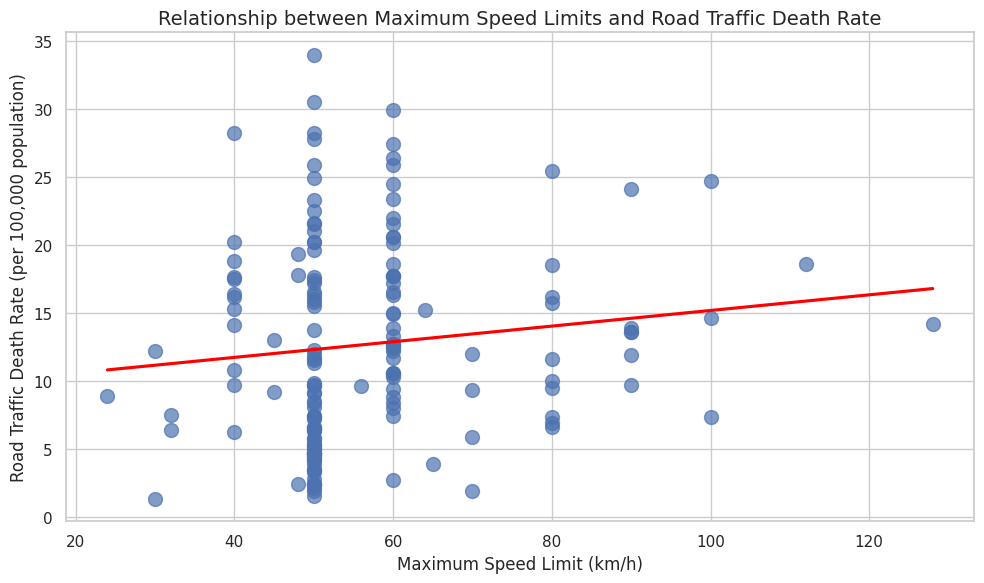

In [43]:
# Plot the scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(
    data=merged_data,
    x='Max_Speed_Limit',
    y='Death_Rate',
    scatter_kws={'s': 100, 'alpha': 0.7},
    line_kws={'color': 'red'},
    ci=None
)

# Add labels and title
plt.title('Relationship between Maximum Speed Limits and Road Traffic Death Rate', fontsize=14)
plt.xlabel('Maximum Speed Limit (km/h)', fontsize=12)
plt.ylabel('Road Traffic Death Rate (per 100,000 population)', fontsize=12)
plt.grid(True)
plt.tight_layout()


# Show the plot
plt.show()

***Yess***

Form the above graph we can clearly say that the regression line is having positive slope so means their is high chance of death with increase in speed


## Emergency at Your Fingertips? A Look at Universal Telephone Access

In medical emergencies, time is life. The ability to quickly reach pre-hospital care services — such as ambulances — often determines survival. But what if dialing for help is not universally possible?

This section dives into the existence of a universal access telephone number for pre-hospital emergency care across countries.

Unique values in Telephone Number Access data:
['-' 'National, multiple numbers' 'National, single number' nan
 'Partial coverage']


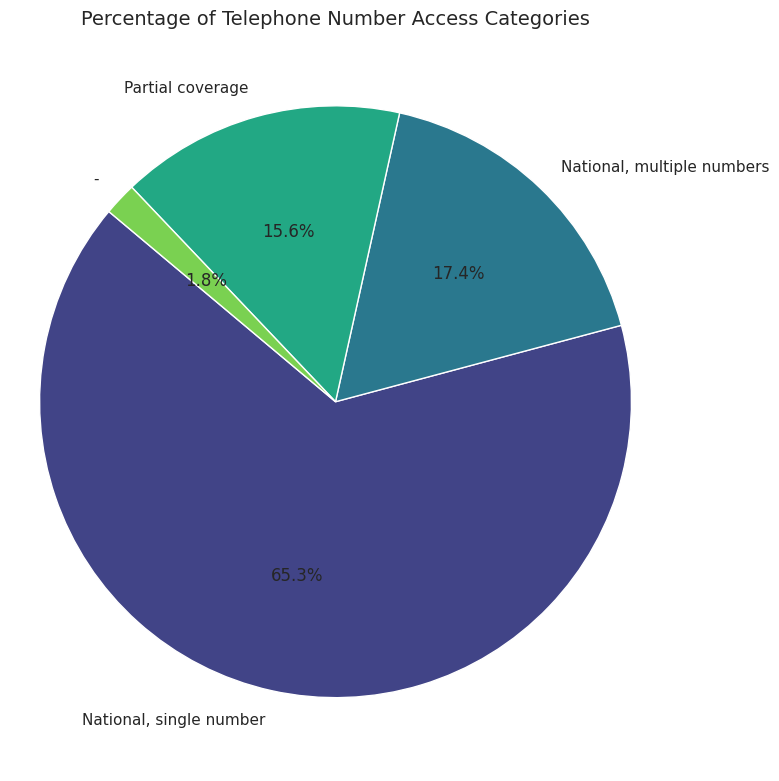

In [44]:
# Filter for telephone number access data
telephone_number_access = df[df['Type'].isin(['Existence of a universal access telephone number for pre-hospital care'])]


print("Unique values in Telephone Number Access data:")
print(telephone_number_access['Value'].unique())


category_counts = telephone_number_access['Value'].value_counts()
#Pie chart for the data
plt.figure(figsize=(8, 8))
plt.pie(
    category_counts.values,
    labels=category_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('viridis', len(category_counts))
)
plt.title('Percentage of Telephone Number Access Categories', fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.tight_layout()
plt.show()

This pie chart shows the division of countries that have national wide emergency number or not and whether it is single number or multiple numbers


##  Emergency Numbers and Emergency Outcomes: What is the Connection?

The question we set out to answer using data on:

*   The existence of a universal access telephone number for pre-hospital care.
* The estimated road traffic death rate (per 100,000 population).

By merging these datasets, we were able to categorize countries by whether they provide this essential service and examine how their death rates compare.

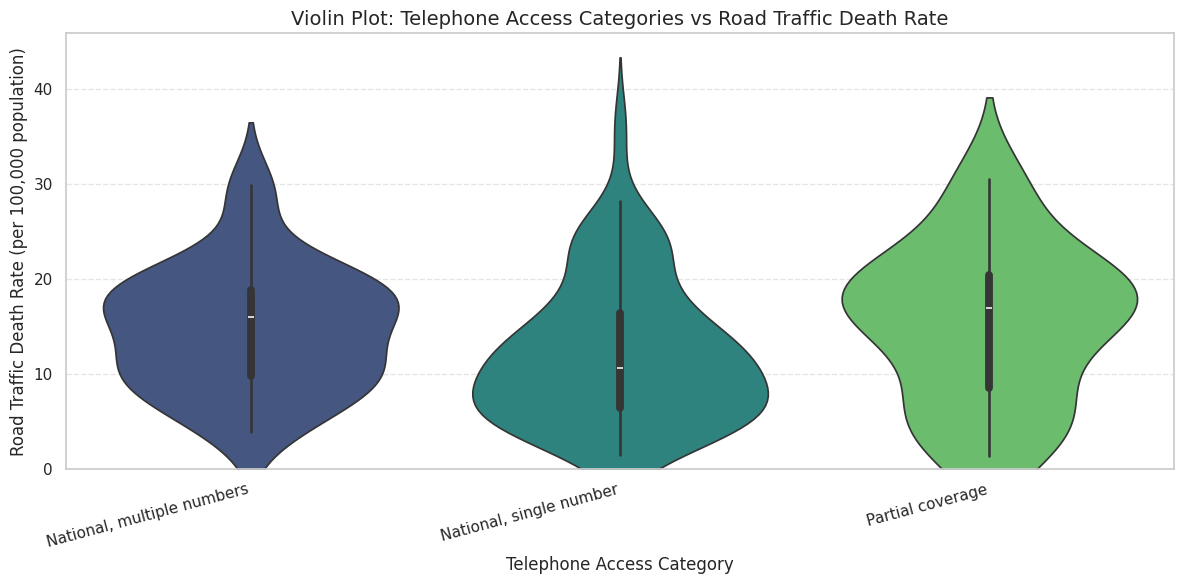

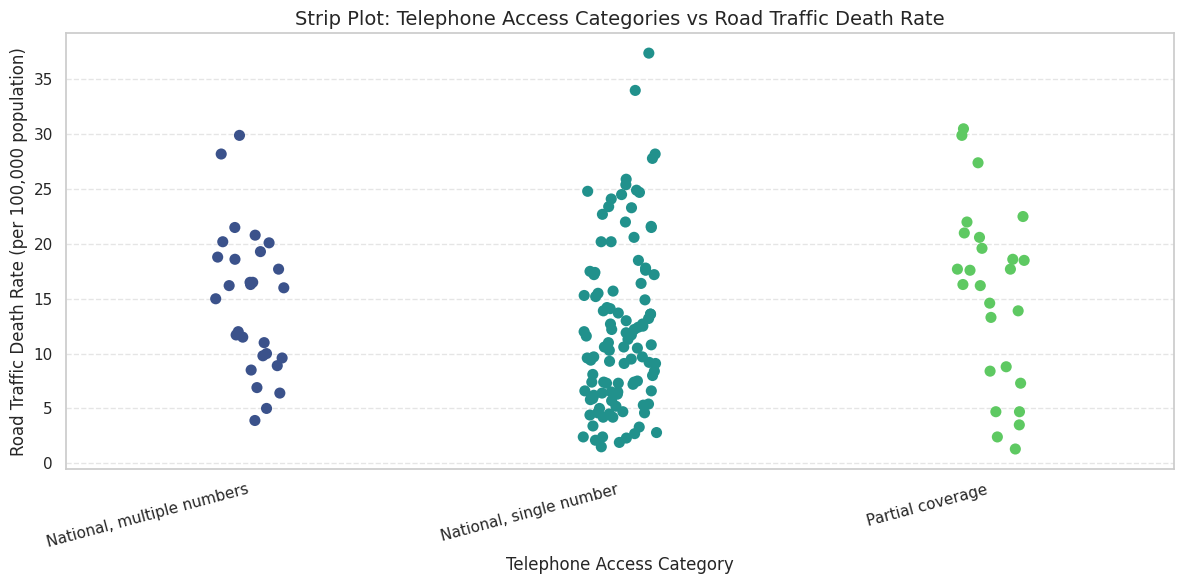

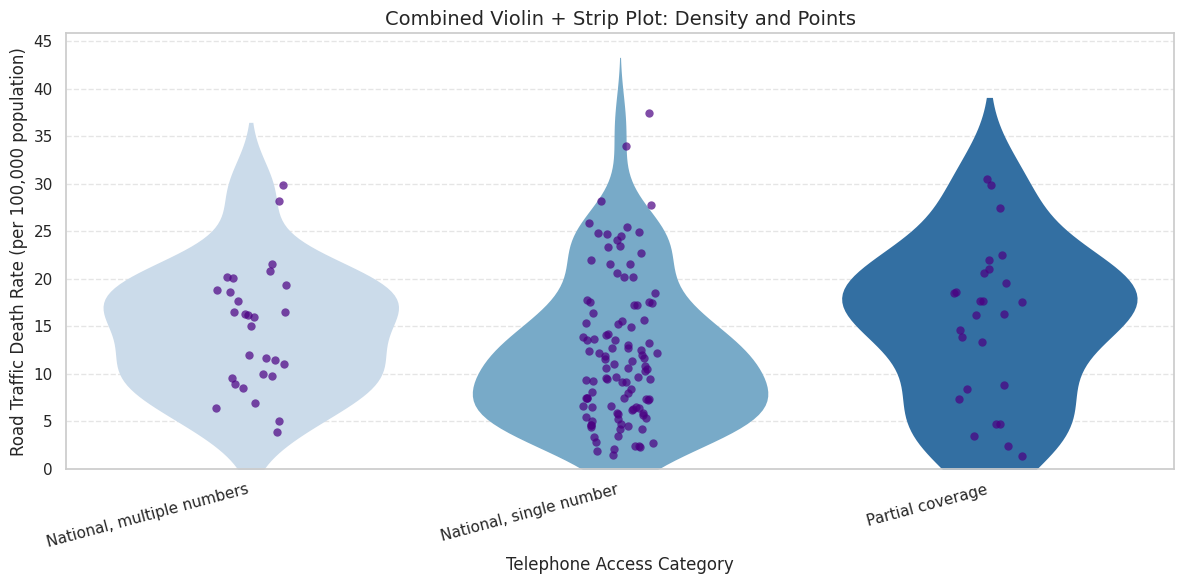

In [45]:
import matplotlib.ticker as ticker

# Filter for telephone number access data
telephone_number_access = df[df['Type'] == 'Existence of a universal access telephone number for pre-hospital care']
# Filter for road traffic death rate data
estimated_road_traffic_death_rate = df[df['Type'] == 'Estimated road traffic death rate (per 100 000 population)']


# Merge the two datasets on 'Country_Code'
merged_data = pd.merge(
    telephone_number_access[['Country_Code', 'Value', 'Global_Location_Name']],
    estimated_road_traffic_death_rate[['Country_Code', 'Value']],
    on='Country_Code',
    suffixes=('_Telephone_Access', '_Death_Rate')
)


# Rename columns for clarity
merged_data.rename(columns={
    'Value_Telephone_Access': 'Telephone_Access',
    'Value_Death_Rate': 'Death_Rate'
}, inplace=True)


# Convert Death_Rate to numeric
merged_data['Death_Rate'] = pd.to_numeric(merged_data['Death_Rate'], errors='coerce')


# Drop rows with missing or invalid data
merged_data.dropna(subset=['Telephone_Access', 'Death_Rate'], inplace=True)


# Remove rows where 'Telephone_Access' is '-'
merged_data = merged_data[merged_data['Telephone_Access'] != '-']


# Violin Plot
plt.figure(figsize=(12, 6))
sns.violinplot(
    data=merged_data,
    x='Telephone_Access',
    y='Death_Rate',
    palette='viridis'
)
plt.ylim(bottom=0)  # This line removes the negative range
plt.title('Violin Plot: Telephone Access Categories vs Road Traffic Death Rate', fontsize=14)
plt.xlabel('Telephone Access Category', fontsize=12)
plt.ylabel('Road Traffic Death Rate (per 100,000 population)', fontsize=12)
plt.xticks(rotation=15, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Strip Plot
plt.figure(figsize=(12, 6))
sns.stripplot(
    data=merged_data,
    x='Telephone_Access',
    y='Death_Rate',
    jitter=True,
    palette='viridis',
    size=8
)
plt.title('Strip Plot: Telephone Access Categories vs Road Traffic Death Rate', fontsize=14)
plt.xlabel('Telephone Access Category', fontsize=12)
plt.ylabel('Road Traffic Death Rate (per 100,000 population)', fontsize=12)
plt.xticks(rotation=15, ha='right')
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(5))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()





plt.figure(figsize=(12, 6))


# Violinplot in light blue (as background for density)
sns.violinplot(
    data=merged_data,
    x='Telephone_Access',
    y='Death_Rate',
    palette='Blues',
    inner=None,
    linewidth=0
)


# Stripplot dots in dark purple for contrast
sns.stripplot(
    data=merged_data,
    x='Telephone_Access',
    y='Death_Rate',
    jitter=True,
    color='#4B0082',  # Indigo
    size=6,
    alpha=0.7
)


plt.title('Combined Violin + Strip Plot: Density and Points', fontsize=14)
plt.xlabel('Telephone Access Category', fontsize=12)
plt.ylabel('Road Traffic Death Rate (per 100,000 population)', fontsize=12)
plt.xticks(rotation=15, ha='right')
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(5))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()




From this graph we can say that National wide and single number has least percentage of road traffic deaths. But we can say this should not be the case, so from this we can conclude that there is not direct relation between telephone access and death rates.